<a href="https://colab.research.google.com/github/csalome24/7-novembre/blob/main/Assignment_6_Multilinear_and_tree_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 6: Multilinear and tree regression model

In [4]:
import pandas as pd  # Import the pandas library and alias it as 'pd'
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

file_path = '/mnt/data/salaries.csv'
salaries_data = pd.read_csv('/content/drive/MyDrive/salaries.csv')

In [7]:
df = pd.read_csv('salaries.csv')

In [8]:
print(df.shape)
df.head()

(397, 6)


,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [10]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [11]:
df.isnull().sum()

,0
rank,0
discipline,0
yrs.since.phd,0
yrs.service,0
sex,0
salary,0


In [12]:
df = pd.get_dummies(df, columns=['rank', 'discipline', 'sex'], drop_first=True)

In [13]:
print(df)

     yrs.since.phd  yrs.service  salary  rank_AsstProf  rank_Prof  \
0               19           18  139750          False       True   
1               20           16  173200          False       True   
2                4            3   79750           True      False   
3               45           39  115000          False       True   
4               40           41  141500          False       True   
..             ...          ...     ...            ...        ...   
392             33           30  103106          False       True   
393             31           19  150564          False       True   
394             42           25  101738          False       True   
395             25           15   95329          False       True   
396              8            4   81035           True      False   

     discipline_B  sex_Male  
0            True      True  
1            True      True  
2            True      True  
3            True      True  
4            True    

In [17]:
import pandas as pd

df['rank_AsstProf'] = df['rank_AsstProf'].astype(int)
df['rank_Prof'] = df['rank_Prof'].astype(int)
df['discipline_B'] = df['discipline_B'].astype(int)
df['sex_Male'] = df['sex_Male'].astype(int)

<Axes: >

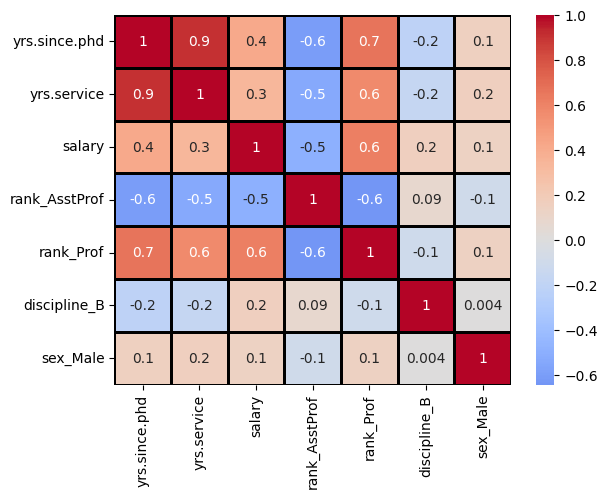

In [21]:
#Correlation Matrix sns. heatmap(df.corr(),
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.1g',
            center = 0,
            cmap = "coolwarm" ,
            linewidths = 1,
            linecolor = 'black')

<Axes: xlabel='yrs.since.phd', ylabel='salary'>

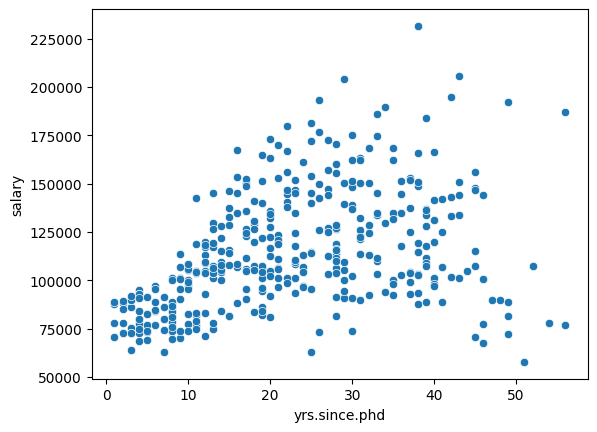

In [22]:
sns.scatterplot(data=df, x='yrs.since.phd', y='salary')

<Axes: xlabel='yrs.since.phd', ylabel='yrs.service'>

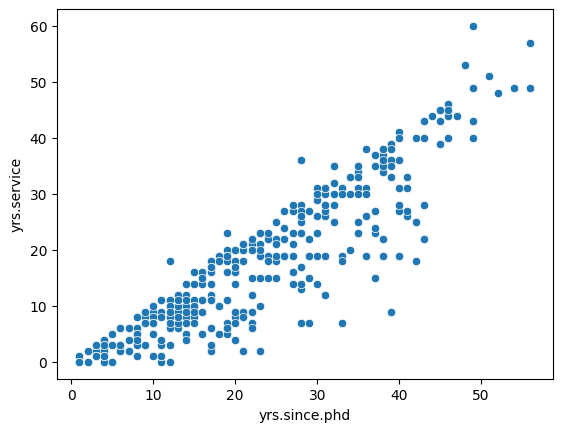

In [23]:
sns.scatterplot(data=df, x='yrs.since.phd', y='yrs.service')

In [24]:
from sklearn.preprocessing import StandardScaler

# Exclude the target variable if you're not standardizing it
X = df.drop (columns=['salary']) # Exclude target variable

# Initialize the scaler
scaler = StandardScaler () #mean = 0; SD = 1

# Fit and transform the features
X_standarized = scaler. fit_transform (X)

# Convert to a dataframe
X_standarized = pd. DataFrame(X_standarized, columns=X. columns)

# Display the standardized dataset
X_standarized. head ( )

,yrs.since.phd,yrs.service,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,-0.257550,0.029669,-0.450589,0.701770,0.915403,0.330058
1,-0.179854,-0.124300,-0.450589,0.701770,0.915403,0.330058
2,-1.422982,-1.125098,2.219318,-1.424968,0.915403,0.330058
3,1.762533,1.646343,-0.450589,0.701770,0.915403,0.330058
4,1.374055,1.800312,-0.450589,0.701770,0.915403,0.330058


In [29]:
import statsmodels.api as sm #Import the required statsmodels library
import pandas as pd

#Prepare X and Y
y = df['salary']
X = df.drop(columns=['salary'])

# Use X (or X_standarized from previous cell, if intended)
# If you intended to use the standardized data, change X to X_standarized
X_standarized = sm.add_constant(X)

In [30]:
#Prepare X and Y
y = df['salary']
X = df.drop (columns=['salary'])
X_standarized = sm.add_constant(X)

#Training and Test Set
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_standarized, y,
                                                       test_size = 0.2,
                                                       random_state = 1502)

#Regression model
model = sm.OLS(y_train1, X_train1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     46.96
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           8.47e-41
Time:                        15:54:36   Log-Likelihood:                -3613.5
No. Observations:                 317   AIC:                             7241.
Df Residuals:                     310   BIC:                             7267.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.886e+04   5479.688     14.392

In [32]:
#predictions for multilinear regression model
predictions_multilinear = model.predict(X_test1)
predictions_multilinear

,0
364,117218.181686
30,137359.607205
378,117404.155949
188,99065.754032
155,133731.758840
...,...
343,133359.810314
366,119381.716782
79,87704.957414
135,118522.494985


In [33]:
results_multilinear = pd. DataFrame ({
    'Actual': y_test1. values.astype(int),
    'Predicted': predictions_multilinear.astype(int)
})
results_multilinear

,Actual,Predicted
364,205500,117218
30,132261,137359
378,150680,117404
188,106300,99065
155,118971,133731
...,...,...
343,162150,133359
366,115435,119381
79,84240,87704
135,136000,118522


In [37]:
#accuracy assessment
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np # Import numpy for using np.sqrt

# Change 'y_testl' to 'y_test1' in both functions
print ("MAE:" , round (mean_absolute_error (y_test1, predictions_multilinear), 0))
print ("RMSE:", round (np.sqrt (mean_squared_error (y_test1, predictions_multilinear)), 0))

MAE: 18027.0
RMSE: 25448.0


In [38]:
df1 = df.drop(columns=['yrs.since.phd','yrs.service','sex_Male'])

In [41]:
X1 = df1. drop (columns=['salary']) # Exclude target variable

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_standarized = scaler.fit_transform(X1)

# Convert to a dataframe
X_standarized = pd. DataFrame(X_standarized, columns=X1. columns)

#Prepare X and Y
y = df1[ 'salary']
X_standarized = sm. add_constant (X1)

#Training and Test Set
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train, Y_test1 = train_test_split(X_standarized, y,
                                                       test_size = 0.2,
                                                       random_state = 1502)
#Regression model
model = sm.OLS(y_train, X_train1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     93.27
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           3.82e-43
Time:                        16:12:17   Log-Likelihood:                -3614.7
No. Observations:                 317   AIC:                             7237.
Df Residuals:                     313   BIC:                             7253.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.357e+04   3552.163     23.525

Evaluation of Performance: The R-squared and adjusted R-squared values remain nearly unchanged, indicating no notable improvement in the model's ability to explain variance. However, there is a significant increase in the F-statistic, reflecting greater overall model significance.

In [42]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
#Training and Test Set
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y,
                                                        test_size = 0.2,
                                                        random_state = 1502)

In [44]:
# Initialize the model
tree_model = DecisionTreeRegressor (random_state=42)

# Train the model
tree_model. fit(X_train2, y_train2)

DecisionTreeRegressor(random_state=42)

In [45]:
# Get feature importance
feature_importance = tree_model. feature_importances_

In [48]:
# Create a DataFrame to display feature importance alongside feature names
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance # Changed 'feature_importances' to 'feature_importance'
}).sort_values(by='Importance', ascending=False)
print(importance_df)

         Feature  Importance
3      rank_Prof    0.422131
0  yrs.since.phd    0.242765
1    yrs.service    0.224974
4   discipline_B    0.074614
5       sex_Male    0.018906
2  rank_AsstProf    0.016611


In [49]:
# Make predictions on the test set for tree regression model
predictions_tree = tree_model.predict(X_test2)

In [51]:
#Result for tree regression
results_tree = pd.DataFrame({
    'Actual': y_test2.values.astype(int),
    'Predicted': predictions_tree.astype(int) # Call astype as a method of predictions_tree
})
results_tree

,Actual,Predicted
0,205500,143940
1,132261,165000
2,150680,135200
3,106300,105350
4,118971,170000
...,...,...
75,162150,162221
76,115435,114330
77,84240,88825
78,136000,126300


In [53]:
# Calculate performance metrics for tree regression
print ("MAE:", round(mean_absolute_error(y_test2, predictions_tree), 0))
print ("RMSE:", round(np.sqrt(mean_squared_error(y_test2, predictions_tree)), 0))

MAE: 20950.0
RMSE: 29733.0


In [55]:
print(df.columns)
df2 = df.drop(columns=[col for col in ['discipline_B','sex_Male', 'rank_AssProf'] if col in df.columns])
print(df2.columns)

Index(['yrs.since.phd', 'yrs.service', 'salary', 'rank_AsstProf', 'rank_Prof',
       'discipline_B', 'sex_Male'],
      dtype='object')
Index(['yrs.since.phd', 'yrs.service', 'salary', 'rank_AsstProf', 'rank_Prof'], dtype='object')


In [56]:
X2 = df2.drop(columns=['salary'])

In [57]:
y = df2['salary']
#

In [59]:
#Training and Test Set
from sklearn.model_selection import train_test_split
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, y,
                                                        test_size = 0.2,
                                                        random_state = 1502)
tree_model = DecisionTreeRegressor (random_state=42)

# Train the model
tree_model. fit(X_train2, y_train2)
# Make predictions on the test set for tree regression model
predictions_tree = tree_model. predict(X_test2)

#Result for tree regression
results_tree2 = pd. DataFrame ({
    'Actual': Y_test2.values.astype(int), # Changed _test2 to Y_test2
    'Predicted': predictions_tree.astype (int)
})
results_tree2

,Actual,Predicted
0,205500,143940
1,132261,96545
2,150680,151421
3,106300,73300
4,118971,170000
...,...,...
75,162150,126000
76,115435,107986
77,84240,88825
78,136000,139928


In [61]:
print ("MAE:", round (mean_absolute_error (y_test2, predictions_tree), 0))
print ("RMSE:", round (np.sqrt (mean_squared_error(y_test2, predictions_tree)), 0))

MAE: 20912.0
RMSE: 29919.0


In [63]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
from math import sqrt

In [66]:
X = df. drop (columns=['salary'])
y = df ['salary']
X_train, X_test, y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model. fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [68]:
y_pred = rf_model. predict(X_test)

In [70]:
# ipython-input-66-70b5f750821a
X = df.drop(columns=['salary'])
y = df['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Changed Y_test to y_test

In [71]:
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print (mae)
print (rmse)

17258.789347767855
23438.488061209762
